In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 

In [70]:
df = pd.read_csv('2022_forbes_billionaires.csv')

In [71]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [72]:
df.shape[0]

2600

In [73]:
df.shape[1]

7

In [74]:
df.shape

(2600, 7)

In [75]:
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [76]:
df.tail()

,rank,name,networth,age,country,source,industry
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [78]:
df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [79]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [126]:
#univariate

In [82]:
df['rank']

0          1
1          2
2          3
3          4
4          5
        ... 
2595    2578
2596    2578
2597    2578
2598    2578
2599    2578
Name: rank, Length: 2600, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_8256\1839038237.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rank'])


<Axes: xlabel='rank', ylabel='Density'>

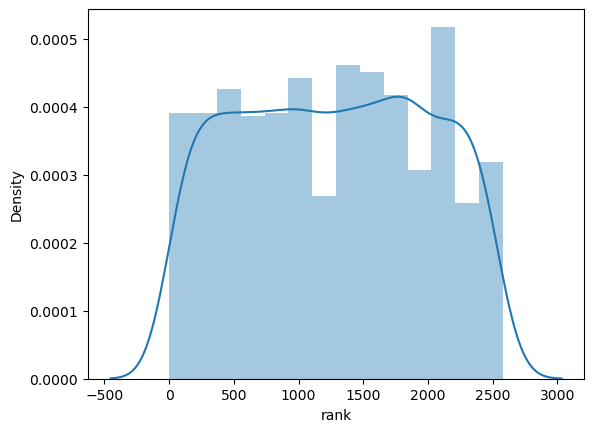

In [83]:
# above rank columns is not a gaussian the points is spread across whole graph
# also mean and median is not same
sns.distplot(df['rank'])

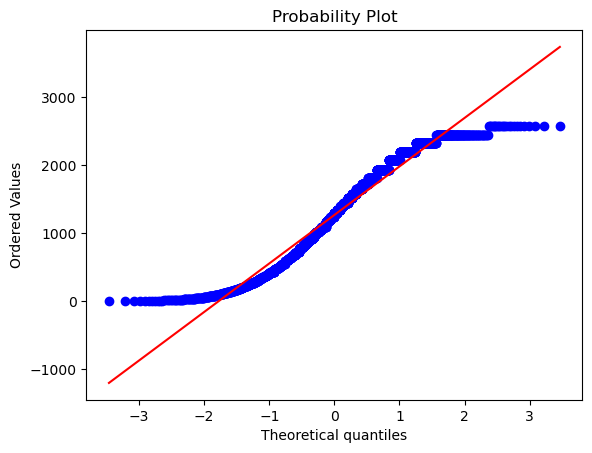

In [84]:
# the rank column points is not on the straight line so it is not gaussian distributed column
stats.probplot(df['rank'], dist = 'norm', plot = plt)
plt.show()

In [85]:
# when we applied the log tansformation on the rank column then also no effect 
#it is looking like a left skewed
log = np.log(df['rank'])

C:\Users\khair\AppData\Local\Temp\ipykernel_8256\3289196602.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log)


<Axes: xlabel='rank', ylabel='Density'>

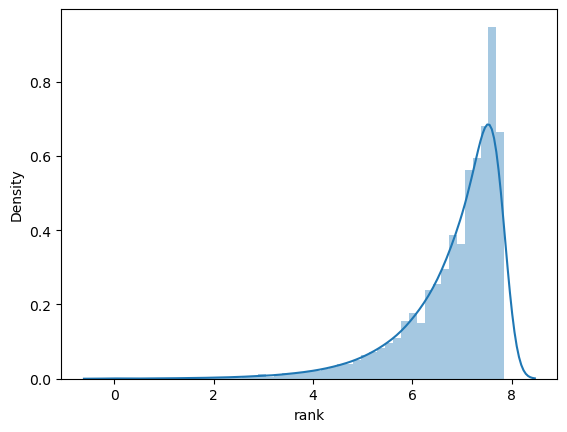

In [86]:
sns.distplot(log)

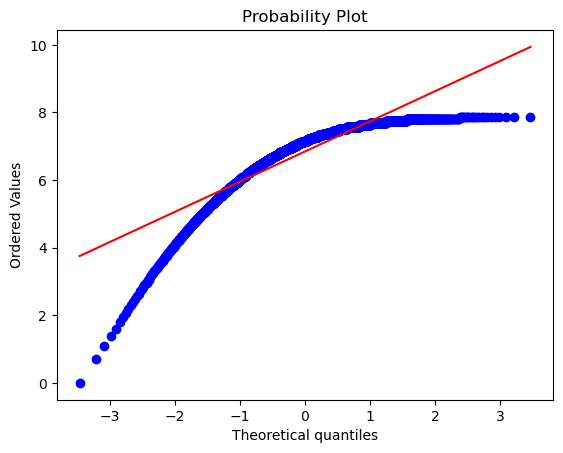

In [87]:
stats.probplot(log, dist = 'norm', plot = plt)
plt.show()

In [213]:
# chebysheves & equality theorem 
# both actual_2 & actual_3 are 1.0 and thus the chebysheves & equality is satisfied
mean = np.mean(df['rank'])
std= np.std(df['rank'])
second1 = mean - 2 * std
second2 = mean + 2 * std
third1 = mean - 3 * std
third2 = mean + 3 * std
actual_2 = ((df['rank'] >= second1) & (df['rank'] <= second2)).mean()
actual_3 = ((df['rank'] >= third1) & (df['rank'] <= third2)).mean()

In [214]:
actual_2

np.float64(1.0)

In [215]:
actual_3

np.float64(1.0)

<Axes: ylabel='rank'>

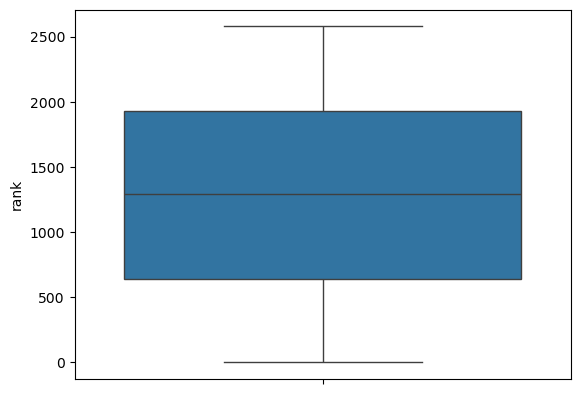

In [88]:
# there is no outliers present in rank column
# both the whisker's length is approximetly equal
sns.boxplot(df['rank'])

In [89]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [90]:
df['name']

0                      Elon Musk 
1                     Jeff Bezos 
2       Bernard Arnault & family 
3                     Bill Gates 
4                 Warren Buffett 
                  ...            
2595      Jorge Gallardo Ballart 
2596                Nari Genomal 
2597              Ramesh Genomal 
2598              Sunder Genomal 
2599       Horst-Otto Gerberding 
Name: name, Length: 2600, dtype: object

In [91]:
df['name'].unique()

array(['Elon Musk ', 'Jeff Bezos ', 'Bernard Arnault & family ', ...,
       'Ramesh Genomal ', 'Sunder Genomal ', 'Horst-Otto Gerberding '],
      dtype=object)

In [92]:
df['name'].value_counts()

name
Wang Yanqing & family        2
Li Li                        2
Bernard Arnault & family     1
Bill Gates                   1
Warren Buffett               1
                            ..
Alice Walton                 1
Rob Walton                   1
Changpeng Zhao               1
Charles Koch                 1
Jeff Bezos                   1
Name: count, Length: 2598, dtype: int64

In [93]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [94]:
df['networth']

0       $219 B
1       $171 B
2       $158 B
3       $129 B
4       $118 B
         ...  
2595      $1 B
2596      $1 B
2597      $1 B
2598      $1 B
2599      $1 B
Name: networth, Length: 2600, dtype: object

In [95]:
df['networth'].value_counts()

networth
$1.5 B     147
$1.3 B     134
$1.1 B     130
$1.2 B     124
$1.4 B     114
          ... 
$12.4 B      1
$12.5 B      1
$12.6 B      1
$11.6 B      1
$11 B        1
Name: count, Length: 228, dtype: int64

In [96]:
#data cleaning of networth column

In [97]:
df['networth'] = df['networth'].str.replace(r'/s+', '', regex = True)
df['networth'] = df['networth'].str.replace('$', '')
df['networth'] = df['networth'].str.replace('B', '')

In [98]:
df['networth'] = df['networth'].astype('float')

C:\Users\khair\AppData\Local\Temp\ipykernel_8256\3212466448.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['networth'])


<Axes: xlabel='networth', ylabel='Density'>

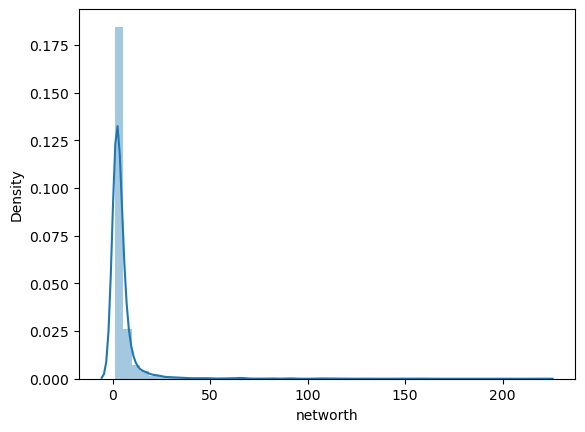

In [99]:
# on the above networth column we perform data cleaning on that 
# now i seen the column is not looking like a gaussian distributed
# it is somewhat looking like a right skewed
sns.distplot(df['networth'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      2600 non-null   int64  
 1   name      2600 non-null   object 
 2   networth  2600 non-null   float64
 3   age       2600 non-null   int64  
 4   country   2600 non-null   object 
 5   source    2600 non-null   object 
 6   industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


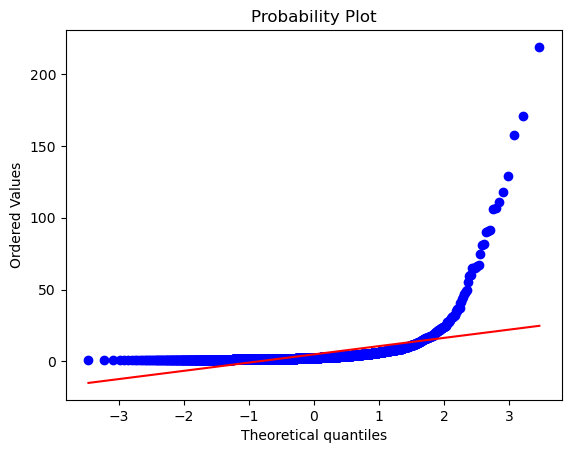

In [101]:
# i drawn QQ plot but i cant see the effect, the points is not falling on the straight line 
stats.probplot(df['networth'], dist = 'norm', plot = plt)
plt.show()

In [102]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [103]:
df['age']

0       50
1       58
2       73
3       66
4       91
        ..
2595    80
2596    82
2597    71
2598    68
2599    69
Name: age, Length: 2600, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_8256\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

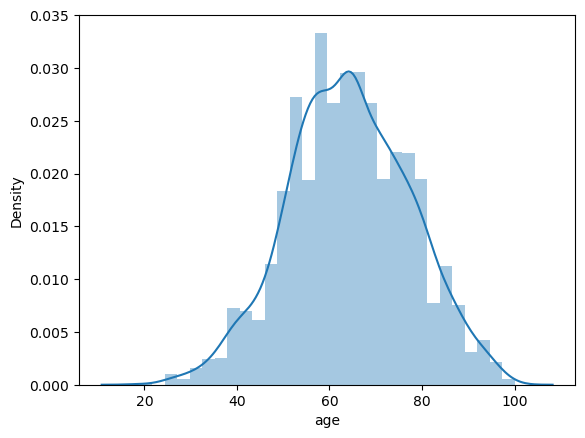

In [104]:
# the age column is somewhat looking like a gaussian distributed
# most of the values is lies between the mean and it is bell shaped
sns.distplot(df['age'])

<Axes: ylabel='networth'>

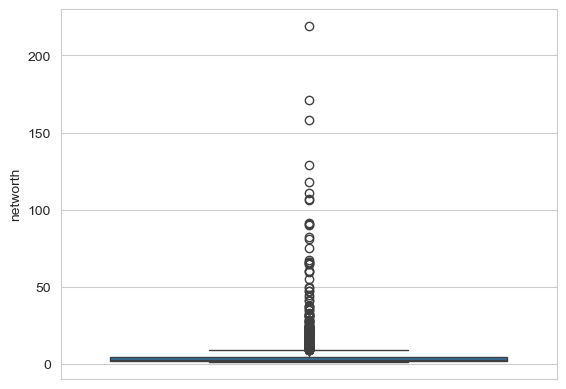

In [216]:
# there are lots of outliers present in this column 
# i cant see the whiskers in this plot
sns.boxplot(df['networth'])

## Conclusion for `Networth` column
- **Observation** :- there are lots of outliers present in this column

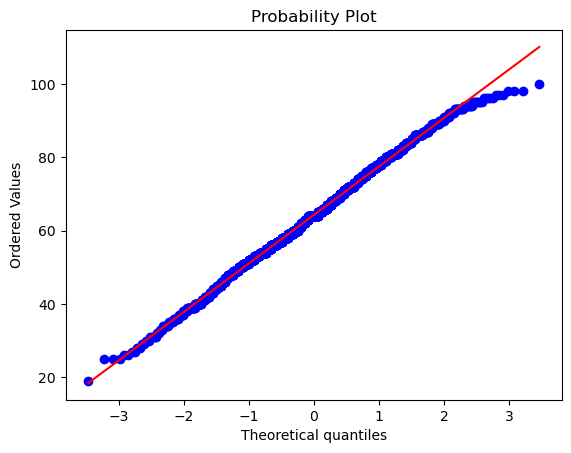

In [106]:
# most of the points in the age column is falling on the straight line so we called it as a gaussian distributed
stats.probplot(df['age'], dist = 'norm', plot = plt)
plt.show()

In [107]:
mean = np.mean(df['age'])

In [108]:
mean

np.float64(64.27192307692307)

In [109]:
std = np.std(df['age'])

In [110]:
std

13.218063840305442

In [111]:
# empirical properties for age column
# 68% range 51.05385923661763 to 77.48998691722852
# 95% range 37.83579539631219 to 90.70805075753395
# 99% range 24.617731556006746 to 103.9261145978394
first1 = mean - 1 * std
first2 = mean + 1 * std
second1 = mean - 2 * std
second2 = mean + 2 * std
third1 = mean - 3 * std
third2 = mean + 3 * std
print('68% range', first1, 'to', first2)
print('95% range', second1, 'to', second2)
print('99% range', third1, 'to', third2)

68% range 51.05385923661763 to 77.48998691722852
95% range 37.83579539631219 to 90.70805075753395
99% range 24.617731556006746 to 103.9261145978394


In [112]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [113]:
df['country']

0       United States
1       United States
2              France
3       United States
4       United States
            ...      
2595            Spain
2596      Philippines
2597      Philippines
2598      Philippines
2599          Germany
Name: country, Length: 2600, dtype: object

In [223]:
df['country'].value_counts().head(20)#.plot(kind='bar');

country
United States     719
China             515
India             161
Germany           130
Russia             81
Hong Kong          67
Canada             64
Brazil             60
Italy              52
Taiwan             51
United Kingdom     49
Sweden             45
Australia          44
France             43
Switzerland        41
South Korea        41
Japan              36
Indonesia          30
Israel             29
Thailand           28
Name: count, dtype: int64

In [115]:
df['country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [117]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [118]:
df['source']

0                Tesla, SpaceX
1                       Amazon
2                         LVMH
3                    Microsoft
4           Berkshire Hathaway
                 ...          
2595           pharmaceuticals
2596                   apparel
2597                   apparel
2598                  garments
2599    flavors and fragrances
Name: source, Length: 2600, dtype: object

In [119]:
df['source'].unique()

array(['Tesla, SpaceX', 'Amazon', 'LVMH', 'Microsoft',
       'Berkshire Hathaway', 'Google', 'software', 'diversified',
       'infrastructure, commodities', 'Bloomberg LP', 'telecom',
       "L'Oréal", 'Facebook', 'Walmart', 'beverages, pharmaceuticals',
       'cryptocurrency exchange', 'Koch Industries', 'Zara',
       'Dell computers', 'TikTok', 'media', 'Nike', 'retail', 'batteries',
       'shipping', 'luxury goods', 'internet media', 'supermarkets',
       'Nutella, chocolates', 'investments', 'real estate',
       'music, chemicals', 'candy, pet food', 'Chanel', 'mining',
       'software services', 'hedge funds', 'home appliances', 'casinos',
       'Red Bull', 'eyeglasses', 'fashion retail', 'online games',
       'BMW, pharmaceuticals', 'vaccines', 'package delivery',
       'pig breeding', 'sensors', 'automobiles', 'cheese',
       'banking, tobacco', 'Estee Lauder', 'fintech', 'e-commerce',
       'Quicken Loans', 'hospitals', 'internet, telecom',
       'money management

In [120]:
df['source'].value_counts()

source
real estate              148
investments               93
pharmaceuticals           91
diversified               83
software                  57
                        ... 
IT                         1
liquefied natural gas      1
stock exchange             1
two-wheelers               1
L'Oréal                    1
Name: count, Length: 895, dtype: int64

In [121]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [224]:
df['industry'].value_

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [123]:
df['industry'].value_counts()

industry
Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: count, dtype: int64

In [124]:
df['industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

<Axes: xlabel='industry'>

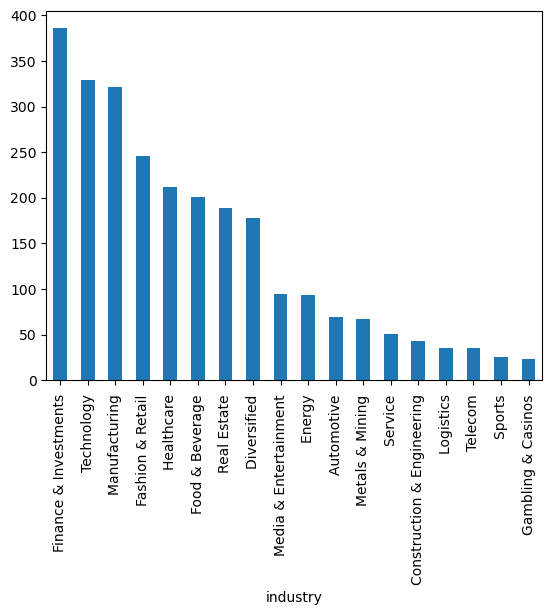

In [125]:
# the most billionares business man is coming from 'Finance & Investments', 'Technology' & 'Manufacturing'
df['industry'].value_counts().plot(kind = 'bar')

In [127]:
# bivariate

In [129]:
df1 = df[df['country'] == 'India']

In [130]:
df1

,rank,name,networth,age,country,source,industry
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified
10,11,Gautam Adani & family,90.0,59,India,"infrastructure, commodities",Diversified
46,47,Shiv Nadar,28.7,76,India,software services,Technology
56,56,Cyrus Poonawalla,24.3,80,India,vaccines,Healthcare
80,81,Radhakishan Damani,20.0,67,India,"retail, investments",Fashion & Retail
...,...,...,...,...,...,...,...
2539,2448,Kavita Singhania,1.1,60,India,cement,Manufacturing
2542,2448,Ashok Soota,1.1,79,India,software services,Technology
2544,2448,Venu Srinivasan,1.1,69,India,two-wheelers,Automotive
2551,2448,Sunil Vachani,1.1,53,India,electronics,Manufacturing


In [140]:
data = df[(df['country'] == 'India') | (df['country'] == 'United States')]

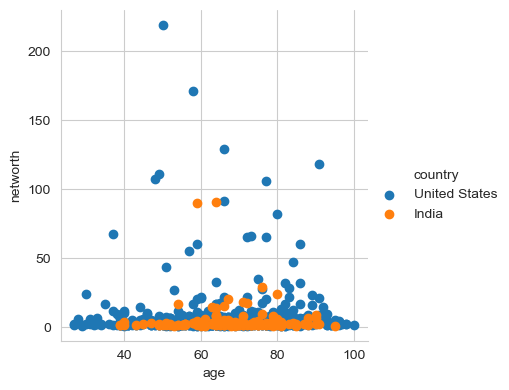

In [141]:
# there are lots of billionare people present in US as compared to india
# there are lots of people in both country whose networth is 0 only the few people whose networth > 0
# only 2 indians have the networth > 0
sns.set_style('whitegrid')
sns.FacetGrid(data, hue = 'country', height = 4).map(plt.scatter, 'age', 'networth').add_legend()
plt.show() 

In [142]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [161]:
data1 = df[df['networth'] > 50.0]

In [162]:
data1

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


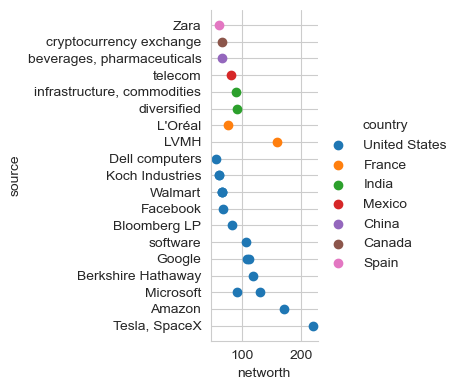

In [165]:
# microsoft, Amazon, LVMH, Tesla & SpaceX are the most valuable brand whose owner networth is >= 100
# microsoft, Amazon, Tesla & SpaceX are the US based companies
# LVMH, are the france based companies
sns.set_style('whitegrid')
sns.FacetGrid(data1, hue = 'country', height = 4).map(plt.scatter, 'networth', 'source').add_legend()
plt.show() 

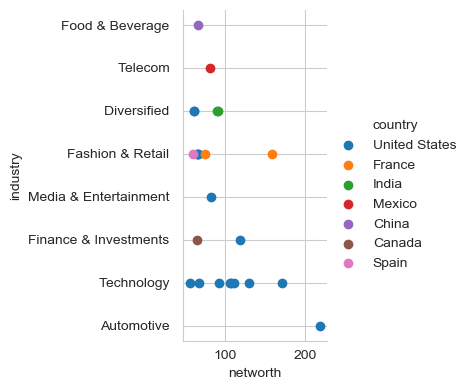

In [166]:
# the graph telling more american companies doing career in the technological field & smoewhat in media, automotive & finance
sns.set_style('whitegrid')
sns.FacetGrid(data1, hue = 'country', height = 4).map(plt.scatter, 'networth', 'industry').add_legend()
plt.show() 

In [167]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [168]:
data3 = df[df['networth'] == 1.0]

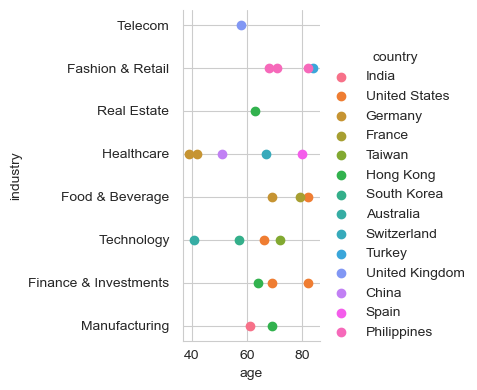

In [169]:
# in this graph the people whose networth is 1 billions
# most of the people's age is almost 60+ 
# only few people's whose age is < 60
sns.set_style('whitegrid')
sns.FacetGrid(data3, hue = 'country', height = 4).map(plt.scatter, 'age', 'industry').add_legend()
plt.show() 

In [170]:
# data extraction

In [171]:
# give me the data of that people whose networth > 50

In [172]:
df[df['networth'] > 50.0]

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


In [173]:
# give me the data of that people whose age > 55

In [174]:
df[df['age'] > 55]

,rank,name,networth,age,country,source,industry
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
7,8,Larry Ellison,106.0,77,United States,software,Technology
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [175]:
# give me the data of that people whose age < 45 & networth > 50.0

In [176]:
df[(df['age'] > 45) & (df['networth'] > 50.0)]

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


In [177]:
# give me the data of that people whose networth 150.0

In [178]:
df[df['networth'] > 150.0]

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail


In [179]:
# give me the data of that people whose industry == 'Technology'

In [183]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [190]:
df[df['industry'] == 'Technology ']

,rank,name,networth,age,country,source,industry
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
...,...,...,...,...,...,...,...
2565,2448,Jane Yan & family,1.1,52,China,software,Technology
2582,2578,Tony Chen,1.0,72,Taiwan,electronics,Technology
2584,2578,Chey Ki-won,1.0,57,South Korea,"computer services, telecom",Technology
2587,2578,Doug Clarke,1.0,41,Australia,"cameras, software",Technology


In [189]:
df['industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [191]:
# give me the data of that people whose industry == 'Technology' & age > 45

In [193]:
df[(df['industry'] == 'Technology ') & (df['age'] > 45)]

,rank,name,networth,age,country,source,industry
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
...,...,...,...,...,...,...,...
2542,2448,Ashok Soota,1.1,79,India,software services,Technology
2565,2448,Jane Yan & family,1.1,52,China,software,Technology
2582,2578,Tony Chen,1.0,72,Taiwan,electronics,Technology
2584,2578,Chey Ki-won,1.0,57,South Korea,"computer services, telecom",Technology


In [194]:
# give the data whose industry 'Metals & Mining ' and age > 60

In [195]:
df[(df['industry'] == 'Metals & Mining ') & (df['age'] > 60)]

,rank,name,networth,age,country,source,industry
44,45,German Larrea Mota Velasco & family,30.8,68,Mexico,mining,Metals & Mining
45,46,Gina Rinehart,30.2,68,Australia,mining,Metals & Mining
66,67,Iris Fontbona & family,22.8,79,Chile,mining,Metals & Mining
86,87,Vladimir Lisin,18.4,65,Russia,"steel, transport",Metals & Mining
88,89,Lakshmi Mittal,17.9,71,India,steel,Metals & Mining
91,91,Savitri Jindal & family,17.7,72,India,steel,Metals & Mining
96,97,Vladimir Potanin,17.3,61,Russia,metals,Metals & Mining
169,167,Alisher Usmanov,11.5,68,Russia,"steel, telecom, investments",Metals & Mining
218,218,Zheng Shuliang & family,9.4,76,China,aluminum products,Metals & Mining
222,223,Ivan Glasenberg,9.1,65,Switzerland,mining,Metals & Mining


In [196]:
# give me the data where the country 'india' 

In [197]:
df[df['country'] == 'India']

,rank,name,networth,age,country,source,industry
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified
10,11,Gautam Adani & family,90.0,59,India,"infrastructure, commodities",Diversified
46,47,Shiv Nadar,28.7,76,India,software services,Technology
56,56,Cyrus Poonawalla,24.3,80,India,vaccines,Healthcare
80,81,Radhakishan Damani,20.0,67,India,"retail, investments",Fashion & Retail
...,...,...,...,...,...,...,...
2539,2448,Kavita Singhania,1.1,60,India,cement,Manufacturing
2542,2448,Ashok Soota,1.1,79,India,software services,Technology
2544,2448,Venu Srinivasan,1.1,69,India,two-wheelers,Automotive
2551,2448,Sunil Vachani,1.1,53,India,electronics,Manufacturing


In [ ]:
# give me the top5 billionare businessman

In [202]:
df1 = df.sort_values(by = ['networth'], ascending = False)

In [204]:
df1.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
# multivariate

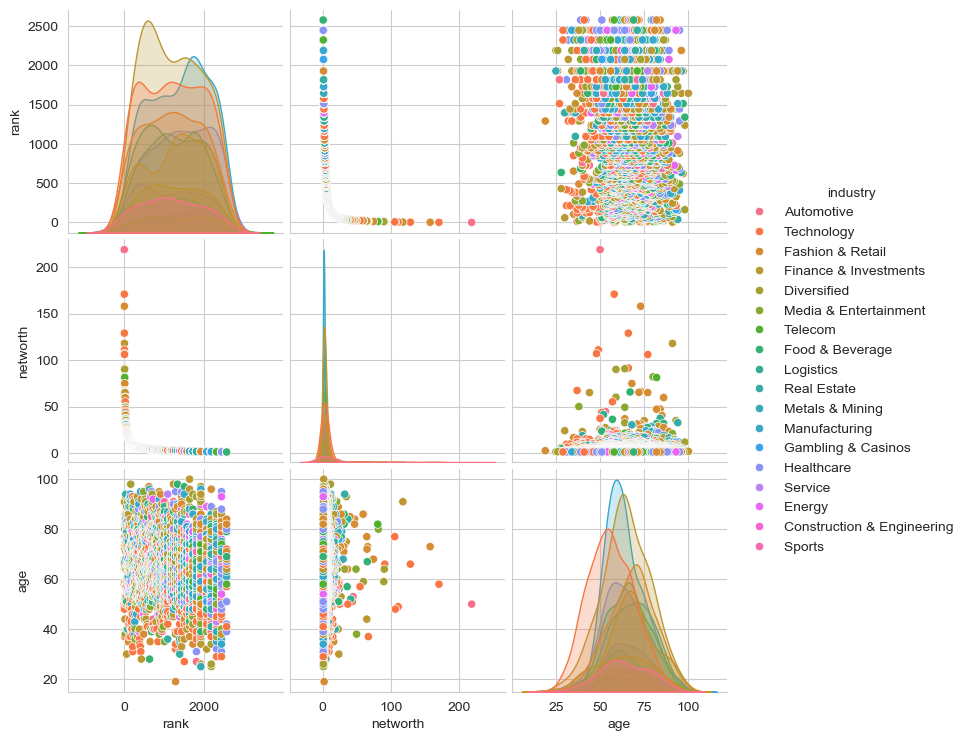

In [205]:
sns.pairplot(df, hue = 'industry')
plt.show()